## KING COUNTY HOUSE SALES ANALYSIS

#### INTRODUCTION
The project aims to investigate how different factors affect the house prices. By building a regression model, we aim to investigate the determinants of house prices inorder to potentially create a predictive tool for use real estate professionls and home owners.

#### OBJECTIVES
1. Price Prediction: Create a model that can accurately forecast the prices of houses based on features such as year built, the size of the house among other features.
2. Identify key determinants: Identify factors that have a significant effect on the prices of the house.


How do different property characteristics (e.g., square footage, number of bedrooms, bathrooms) influence house prices?
What is the impact of location (neighborhood, zip code) on house prices?
How has the housing market in King County changed over time?
Are there any specific features that significantly contribute to house price variations?
Can we identify any outliers or anomalies in the housing data?

#### Loading the dataset

In [3]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfm
import statsmodels.api as sm
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
data = pd.read_csv(r"C:\Users\hp\Documents\practice-project\data\kc_house_data.csv")

#viewing the dataset
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
data. info()

data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

(21597, 21)

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The dataset contains 21597 rows and 21 columns.

### DATA CLEANING

In [6]:
#dropping dupliates
data.drop_duplicates()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [7]:
#dropping columns
columns_to_drop = ['bathrooms', 'bedrooms', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'id']
data = data.drop(columns=columns_to_drop)

#viewing the data
data

,date,price,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated
0,10/13/2014,221900.0,1180,5650,1.0,3,7,1955,0.0
1,12/9/2014,538000.0,2570,7242,2.0,3,7,1951,1991.0
2,2/25/2015,180000.0,770,10000,1.0,3,6,1933,NaN
3,12/9/2014,604000.0,1960,5000,1.0,5,7,1965,0.0
4,2/18/2015,510000.0,1680,8080,1.0,3,8,1987,0.0
...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,1530,1131,3.0,3,8,2009,0.0
21593,2/23/2015,400000.0,2310,5813,2.0,3,8,2014,0.0
21594,6/23/2014,402101.0,1020,1350,2.0,3,7,2009,0.0
21595,1/16/2015,400000.0,1600,2388,2.0,3,8,2004,0.0


#### Handling Missing Values

In [8]:
#checking for missing values
data.isna().sum()

date               0
price              0
sqft_living        0
sqft_lot           0
floors             0
condition          0
grade              0
yr_built           0
yr_renovated    3842
dtype: int64

The yr_renovated has 3842 rows with missing values

In [10]:
#checking for the percentage of missing values in the 'yr_renovated' column
fill_values = {'yr_renovated': data['yr_renovated'].mode()[0]}

missing_percentages = {col: (data[col].isna().mean()) * 100 for col in fill_values}
for col, missing_percent in missing_percentages.items():
    print(f'There is {missing_percent:.2f}% of values missing in {col}.')

There is 17.79% of values missing in yr_renovated.


There is overall missing values represent moderate missing values. We can impute them with the mode as it will not significantly skew the data distribution.
The mode generally represents the most common year and assuming the the missing values cluster around the mode


In [11]:
#filling the missing values in the "yr_renovated" column with the mode
data = data.apply(lambda col: col.fillna(fill_values[col.name]) if col.name in fill_values else col)

In [13]:
#checking for any missing values
data.isna().sum()

date            0
price           0
sqft_living     0
sqft_lot        0
floors          0
condition       0
grade           0
yr_built        0
yr_renovated    0
dtype: int64

The cleaned dataset contains 21597 rows and 8 columns. None of them has any missing values.

### EDA

EDA is the first crucial step before creating a linear regression model. The use of Histograms helps us understand the distribution of the data. A heatmap will help us understand the correlation between the predictor variables and target varible. The use of scatter plots will help us determine the overlall distribution of the data

EDA is useful in:
1. Understanding the data in terms of the relationship between features and target variables. It also helps understand the distribution of the data and what variables are influential to our regression model.
2. Identifying any issues such as outliers in the data.

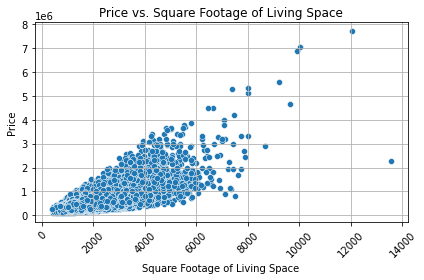

In [14]:
sns.scatterplot(x='sqft_living', y='price', data=data)
plt.title('Price vs. Square Footage of Living Space')
plt.grid(True) 
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### HISTOGRAMS
Histograms are important while building a regression model because they help us understand the following:
1. Understanding the feature distribution by visualizing spread of the data by helping us see if the data follows a normal distribution or if it is skewed on one side. We can also identify outliers in the data that might need further cleaning and investigation.
2. Checking for linear regression assumption that is linearity and normality. In linearity we check if the relationship between the target variable and features is linear. Normality checks if features are normally distributed.

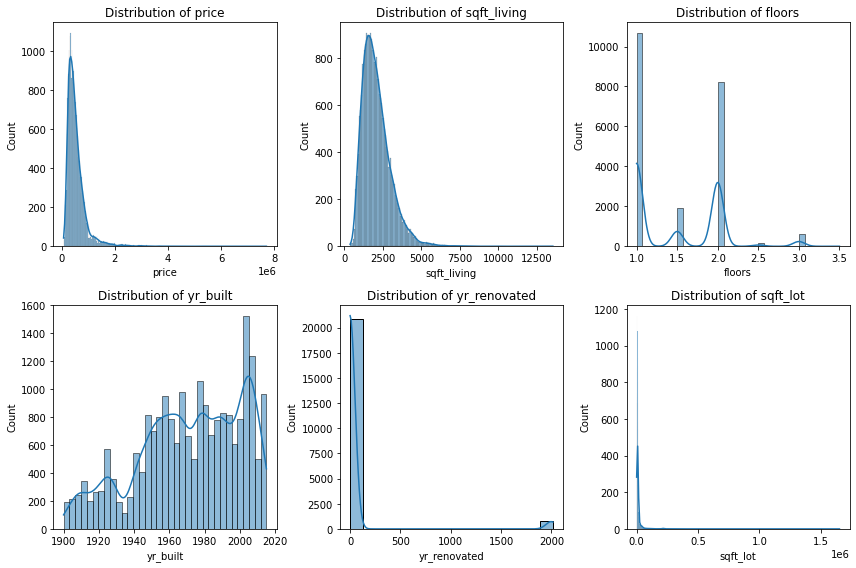

In [16]:
# Histograms for numerical continuous variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(['price', 'sqft_living', 'floors', 'yr_built', 'yr_renovated',  'sqft_lot']):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Distribution of Price: This histogram shows the distribution of housing prices. The x-axis represents price, and the y-axis represents the count of houses within each price range (bins).It appears the distribution might be skewed to the right, with more houses concentrated in lower price ranges.
Distribution of sqft_living: The x-axis represents square footage, and the y-axis indicates the count of houses within each square footage range. It seems the distribution might lean towards lower or moderate square footage values.
Distribution of floors: This histogram depicts the distribution of the number of floors in the houses. The x-axis represents the number of floors, and the y-axis shows the count of houses with that specific number of floors.It appears most houses have one or two floors, with a gradual decrease as the number of floors increases.
Distribution of yr_built: This histogram shows the distribution of the year the houses were built. The x-axis represents the year of construction, and the y-axis indicates the count of houses built in that year.
It seems there might be a peak around a certain year, suggesting a period with a higher volume of construction.
Distribution of yr_renovated: This histogram depicts the distribution of the year the houses were renovated. The x-axis represents the year of renovation, and the y-axis shows the count of houses renovated in that year. There seems to be a significant amount of missing data (indicated by the count at zero on the y-axis) for the year of renovation. 

#### PAIRPLOT

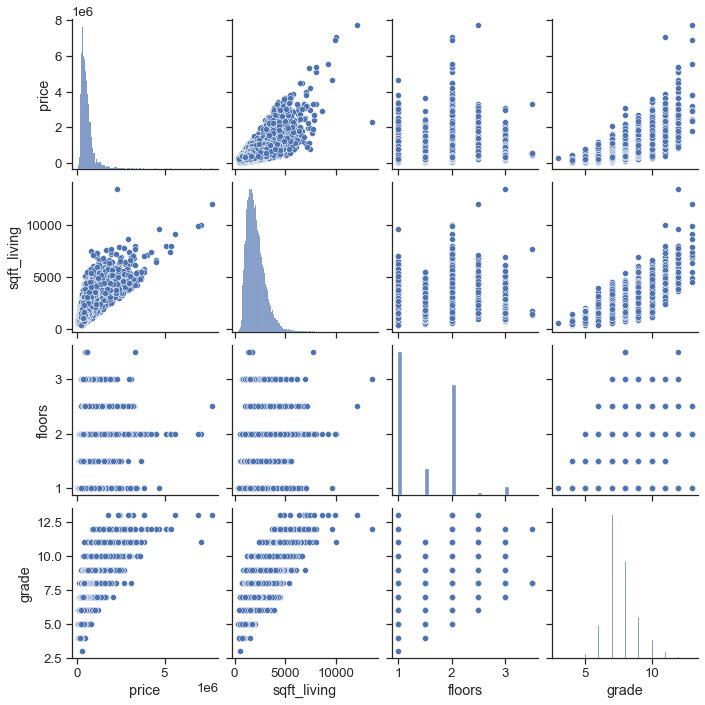

In [18]:
# Pair plot for numerical features
sns.set(style="ticks", color_codes=True, font_scale=1.2)
sns.pairplot(data[['price', 'sqft_living', 'floors', 'grade']])
plt.show()

Price vs. sqft_living: This scatter plot shows a positive correlation between the price of a house and its square footage of living space. As the square footage increases, the price tends to increase as well. There seems to be some spread around the trend, indicating that other factors besides square footage also influence price.
Price vs. floors: There appears to be a weaker positive correlation between price and the number of floors. While some expensive houses have many floors, there are also expensive houses with fewer floors. This suggests that the number of floors might not be as influential on price as square footage.

#### HEATMAP
Values closer to 1: Represent a strong positive correlation, meaning as one variable increases, the other tends to increase as well.
Values closer to -1: Indicate a strong negative correlation, where an increase in one variable is associated with a decrease in the other.
Values close to 0: Suggest little to no linear relationship between the variables.

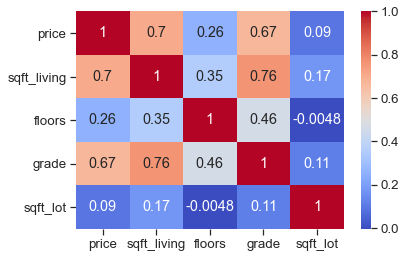

In [19]:
# Correlation matrix
corr_matrix = data[['price', 'sqft_living', 'floors', 'grade', 'sqft_lot']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The heatmap shows a strong positive correlation with sqft_living and a moderate positive correlation with floors. This suggests houses with larger areas and more floors tend to be more expensive.
There might be a weaker positive correlation with grade.